<a href="https://colab.research.google.com/github/claudiamoses/DataScience-Class-Projects/blob/main/Copy_of_DATASCI_112_Lab_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants pitch their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a `for` loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file https://dlsun.github.io/pods/data/sharktank.csv. Read in the data into a Pandas `DataFrame`.



In [ ]:
# read in sharktank data
df_st = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv\
").set_index("Company")
df_st.head()

,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
Company,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mr. Tod's Pie Factory,1.0,1.0,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Wispots,1.0,1.0,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
College Foxes Packing Boxes,1.0,1.0,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ionic Ear,1.0,1.0,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
# fill NaN with zeros in 8 columns
df_st.loc[:, "Corcoran":"Guest"] = df_st.loc[:, "Corcoran":"Guest"].fillna(0)
df_st.head()


,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
Company,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Mr. Tod's Pie Factory,1.0,1.0,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
Wispots,1.0,1.0,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
College Foxes Packing Boxes,1.0,1.0,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Ionic Ear,1.0,1.0,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:
#NOTE: this code can only run once! (because we can only convert a string to a
# float once, and after that it will no longer be a string)

# turn dollar amount into float
df_st["Amount"]= df_st["Amount"].str.replace("[$,]", "",).astype(float)

#turn Equity fraction into float
df_st["Equity"]= df_st["Equity"].str.replace("[%]", "",).astype(float) * 0.01
df_st.head()

<ipython-input-4-d45d09557b03>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_st["Amount"]= df_st["Amount"].str.replace("[$,]", "",).astype(float)
<ipython-input-4-d45d09557b03>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_st["Equity"]= df_st["Equity"].str.replace("[%]", "",).astype(float) * 0.01


,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
Company,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Mr. Tod's Pie Factory,1.0,1.0,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
Wispots,1.0,1.0,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
College Foxes Packing Boxes,1.0,1.0,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Ionic Ear,1.0,1.0,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [ ]:
print(df_st.loc[["The Wall DoctoRX"]])

                  Season  No. in series Deal          Industry  \
Company                                                          
The Wall DoctoRX     5.0           13.0  Yes  Lifestyle / Home   

                 Entrepreneur Gender    Amount  Equity  Corcoran  Cuban  \
Company                                                                   
The Wall DoctoRX                Male  150000.0     0.0       0.0    0.0   

                  Greiner  Herjavec  John  O'Leary  Harrington  Guest  \
Company                                                                 
The Wall DoctoRX      0.0       1.0   0.0      0.0         0.0    0.0   

                                           Details / Notes  
Company                                                     
The Wall DoctoRX  exclusive rights to sell internationally  


In [ ]:
# calculate each company's valuation
df_st["Valuation"] = df_st["Amount"] / df_st["Equity"]

#print top valued companies
df_st["Valuation"].sort_values(ascending=False)


Company
The Wall DoctoRX           inf
Zipz                25000000.0
Emazing Lights      13000000.0
SynDaver Labs       12000000.0
AirCar              10000000.0
                       ...    
Buck Mason                 NaN
Paleo Diet Foods           NaN
Frameri                    NaN
Sunscreen Mist             NaN
Gato Cafe                  NaN
Name: Valuation, Length: 495, dtype: float64

In [ ]:
#print top invested companies
df_st["Amount"].sort_values(ascending=False)

Company
AirCar                             5000000.0
SynDaver Labs                      3000000.0
Zipz                               2500000.0
Ten Thirty One Haunted Hayrides    2000000.0
Rugged Maniac                      1750000.0
                                     ...    
Buck Mason                               NaN
Paleo Diet Foods                         NaN
Frameri                                  NaN
Sunscreen Mist                           NaN
Gato Cafe                                NaN
Name: Amount, Length: 495, dtype: float64

**YOUR INTERPRETATION HERE**

Among the companies that brought in the higest investments, only two also received among the highest valuation. An interesting thing to note is that the company The Wall DoctoRX brought in a $150,000 investment at no equity, setting its valuation at an infinite amount and creating technically the most valuable company. However, we can imagine that the shark who invested that sum took some sort of equity from the company other than ownership, like percentage of future sales. On the other hand, the company that was the most valuable in terms of investment and classic equity was Zipz, which also brought in the highest investment.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [ ]:
# create a column for number of investors
df_st["Number Investors"] = df_st.loc[:, "Corcoran":"Guest"].sum(axis=1)

#create a column for amount spent per shark
df_st["Amount Per Shark"] = df_st["Amount"] / df_st["Number Investors"]
df_st.head()

#multiply each shark by amount per shark
purchase_per_sh = df_st.loc[:, "Corcoran":"Guest"].multiply(df_st["Amount\
 Per Shark"], axis="index")
amt_per_sh = purchase_per_sh.sum(axis=0).sort_values(ascending=False)
amt_per_sh

Cuban         17817500.0
Herjavec      16297500.0
Greiner        8170000.0
John           8154000.0
O'Leary        7952500.0
Corcoran       4912500.0
Harrington      800000.0
Guest           400000.0
dtype: float64

**YOUR INTERPRETATION HERE**

We can see that over the 6 seasons, Mark Cuban invested the most into companies at a whopping $17,817,500. Which makes sense, because Mark Cuban is Mark Cuban.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate for each industry. That is, calculate the conditional distribution $p(funded | industry)$. Make a visualization showing this information.

In [ ]:
# Turn Deal column into summable amount
df_st["Deal"] = (df_st["Deal"] == "Yes").map({True: 1, False: 0})
df_st

,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation,Number Investors,Amount Per Shark
Company,,,,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,1,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,9.090909e+04,1.0,50000.0
Mr. Tod's Pie Factory,1.0,1.0,1,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,9.200000e+05,2.0,230000.0
Wispots,1.0,1.0,0,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
College Foxes Packing Boxes,1.0,1.0,0,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
Ionic Ear,1.0,1.0,0,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Kick Ass,6.0,28.0,1,Children / Education,Female,100000.0,0.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000000e+06,1.0,100000.0
Shark Wheel,6.0,29.0,1,Fitness / Sports,Male,225000.0,0.08,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...,2.812500e+06,3.0,75000.0
Gato Cafe,6.0,29.0,0,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN


Text(0, 0.5, 'Investment Frequency')

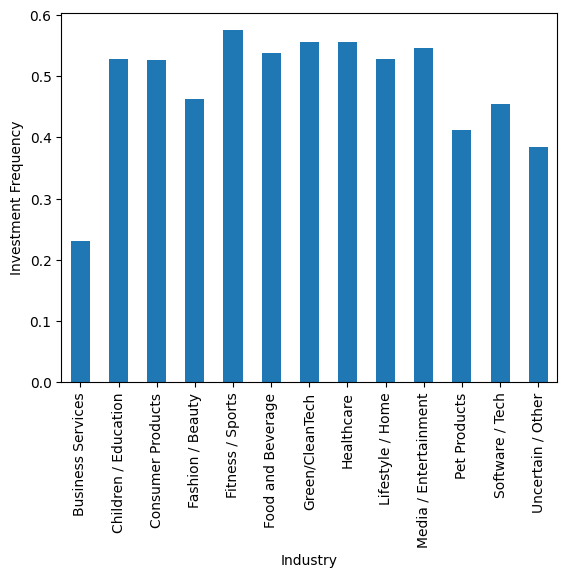

In [ ]:
#Create and plot series based on industry using split-apply-combine method
industry_investment_rate = df_st.groupby("Industry")["Deal"].mean().plot.bar()
industry_investment_rate.set_ylabel("Investment Frequency")

**YOUR INTERPRETATION HERE**

The highest performing industry is Fitness/Sports around 57% funded, and the lowest is Business Services around 23% funded. However, it appears that the sharks don't invest particularily heavily in any one industry.

## Submission Instructions

- Restart this notebook and run the cells from beginning to end.
  - Go to Runtime > Restart and Run All.

In [ ]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Open `_NOTEBOOK.html` in your browser, and save it as a PDF.
    - Go to File > Print > Save as PDF.
- Double check that all of your code and output is visible in the saved PDF.
- Upload the PDF to [Gradescope](https://www.gradescope.com/courses/694907).
    - Please be sure to select the correct pages corresponding to each question.